## Install twint, optimus and reqs

In [13]:
!pip install --user -r requirements.txt

In [4]:
!pip install --upgrade --user -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [13]:
!mv src/twint .
!rm -r src

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("twint/")

In [2]:
import twint

In [3]:
from optimus import Optimus
op = Optimus()

## Setup twint

In [4]:
# Set up TWINT config
c = twint.Config()

In [5]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

# Search for data science tweets

In [6]:
c.Search = "data science"
# Custom output format
c.Format = "Username: {username} |  Tweet: {tweet}"
c.Limit = 1
c.Pandas = True

twint.run.Search(c)

Username: tmj_phl_pharm |  Tweet: If you're looking for work in Spring House, PA, check out this Biotech/Clinical/R&D/Science job via the link in our bio: KellyOCG Exclusive: Data Access Analyst in Spring House, PA- Direct Hire at Kelly Services #KellyJobs #KellyServices
Username: DataSci_Plow |  Tweet: Bring your Jupyter Notebook to life with interactive widgets  https://www.plow.io/post/bring-your-jupyter-notebook-to-life-with-interactive-widgets?utm_source=Twitter&utm_campaign=Data_science … +1 Hal2000Bot #data #science
Username: ottofwagner |  Tweet: Top 7 R Packages for Data Science and AI   https://noeliagorod.com/2019/03/07/top-7-r-packages-for-data-science-and-ai/ … #DataScience #rstats #MachineLearning
Username: semigoose1 |  Tweet: ëäSujy #crypto #bitcoin #java #competition #influencer #datascience #fintech #science #EU  https://vk.com/id15800296  https://semigreeth.wordpress.com/2019/05/03/easujy-crypto-bitcoin-java-competition-influencer-datascience-fintech-science-eu- http

## Saving results into Pandas

In [7]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [8]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [9]:
available_columns()

Index(['conversation_id', 'created_at', 'date', 'day', 'hashtags', 'hour',
       'id', 'link', 'location', 'name', 'near', 'nlikes', 'nreplies',
       'nretweets', 'place', 'profile_image_url', 'quote_url', 'retweet',
       'search', 'timezone', 'tweet', 'user_id', 'user_id_str', 'username'],
      dtype='object')

In [10]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

## Save data to Optimus

In [11]:
df = op.create.data_frame(pdf= df_pd)

# Sentiment analysis

### Clean tweets

In [12]:
clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")

In [13]:
clean_tweets.count()

20

In [14]:
tweets = clean_tweets.select("tweet").rdd.flatMap(lambda x: x).collect()

### Analyze sentiment of tweets

In [15]:
from textblob import TextBlob
from IPython.display import Markdown, display

In [16]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [17]:
for tweet in tweets:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        printmd('Positive', color="green")
    elif analysis.sentiment[0]<0:
        printmd('Negative', color="red")
    else:
        printmd("No result", color="grey")
        print("")

If youre looking for work in Spring House PA check out this BiotechClinicalRDScience job via the link in our bio KellyOCG Exclusive Data Access Analyst in Spring House PA Direct Hire at Kelly Services KellyJobs KellyServices
Sentiment(polarity=0.1, subjectivity=0.4)


<span style='color:green'>Positive</span>

Bring your Jupyter Notebook to life with interactive widgets  httpswwwplowiopostbringyourjupyternotebooktolifewithinteractivewidgetsutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Top 7 R Packages for Data Science and AI   httpsnoeliagorodcom20190307top7rpackagesfordatascienceandai  DataScience rstats MachineLearning
Sentiment(polarity=0.5, subjectivity=0.5)


<span style='color:green'>Positive</span>

eaSujy crypto bitcoin java competition influencer datascience fintech science EU  httpsvkcomid15800296  httpssemigreethwordpresscom20190503easujycryptobitcoinjavacompetitioninfluencerdatasciencefintechscienceeu httpsvkcomid15800296 
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Introduction to Data Analytics for Business  httpzpyioc736cf9f  datascience ad
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


How Entrepreneurs in Emerging Markets can master the Blockchain Technology  httpzpyiof5fad501  datascience ad
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Перевод Почему Data Science командам нужны универсалы а не специалисты  httpshabrcomrupost450420utmsourcedlvritutmmediumtwitterutmcampaign450420  pictwittercomi98frTwPSE
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Orchestra is a RPA for Orchestrating Project Teams BigData Analytics DataScience AI MachineLearning Robotics IoT IIoT PyTorch Python RStats TensorFlow JavaScript ReactJS GoLang CloudComputing Serverless DataScientist Linux lruettimann  httpbitly2Hn6qYd  pictwittercomkXizChP59U
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Heres a typical example of a day in the life of a RagingFX trader Yesterday I received these two signals at 10am EST Heres what I did My other activities have kept me so busy that   httpbitly2Jm9WT1  Learning DataScience bigdata Fintech pictwittercomJbes6ro1lY
Sentiment(polarity=-0.06388888888888887, subjectivity=0.39166666666666666)


<span style='color:red'>Negative</span>

110 Real numbers data science and chaos How to fit any dataset with a single parameter  192 stars  pdf  httpsarxivorgpdf190412320v1pdf   github httpsgithubcomRanlotsingleparameterfit 
Sentiment(polarity=0.17619047619047623, subjectivity=0.3047619047619048)


<span style='color:green'>Positive</span>

Building Data Science Capabilities Means Playing the Long Game  httpdlvritR41k3t  pictwittercomEt5CskR2h4
Sentiment(polarity=-0.225, subjectivity=0.4)


<span style='color:red'>Negative</span>

Building Data Science Capabilities Means Playing the Long Game  httpswwwplowiopostbuildingdatasciencecapabilitiesmeansplayingthelonggameutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=-0.225, subjectivity=0.4)


<span style='color:red'>Negative</span>

Towards Well Being with Data Science part 2  httpdlvritR41k1K  pictwittercom4VbljUcsLh
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Understanding when Simple and Multiple Linear Regression give Different Results  httpswwwplowiopostunderstandingwhensimpleandmultiplelinearregressiongivedifferentresultsutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=0.0, subjectivity=0.319047619047619)


<span style='color:grey'>No result</span>


Artificial Curiosity  httpswwwplowiopostartificialcuriosityutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=-0.6, subjectivity=1.0)


<span style='color:red'>Negative</span>

Synchronizing the Digital SCM using AI for Supply Chain Planning BigData Analytics DataScience AI RPA MachineLearning IoT IIoT Python RStats TensorFlow JavaScript ReactJS GoLang CloudComputing Serverless DataScientist Linux lruettimann  httpbitly2KX8vrt  pictwittercomtftxwilkQf
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


Extreme Rare Event Classification using Autoencoders in Keras  httpswwwplowiopostextremerareeventclassificationusingautoencodersinkerasutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=0.0875, subjectivity=0.95)


<span style='color:green'>Positive</span>

Five Methods to Debug your Neural Network  httpswwwplowiopostfivemethodstodebugyourneuralnetworkutmsourceTwitterutmcampaignDatascience  1 Hal2000Bot data science
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


26 Mobile and Desktop Tools for Marketers  httpbitly2LkL3cN  socialmedia digitalmarketing contentmarketing growthhacking startup SEO ecommerce marketing influencermarketing blogging infographic deeplearning ai machinelearning bigdata datascience fintech pictwittercommxHiY4eNXR
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>No result</span>


ATL DataPros Our analyst prussom is headed your way to speak  the FDSRoadTour on Wed 58 Register to attend for free learn about Modern DataManagement in the Age of Cloud  DataScience Trends Challenges  Opportunities  httpsbitly2WlYOJb  Atlanta freeevent
Sentiment(polarity=0.30000000000000004, subjectivity=0.55)


<span style='color:green'>Positive</span>

## Add sentiments to dataframe

In [19]:
from pyspark.sql.functions import udf

In [24]:
def apply_blob(sentence):
    temp = TextBlob(sentence).sentiment[0]
    if temp == 0.0:
        return 0.0 # Neutral
    elif temp >= 0.0:
        return 1.0 # Positive
    else:
        return 2.0 # Negative

In [20]:
sentiment = udf(apply_blob)

In [23]:
clean_tweets.withColumn("sentiment", sentiment(clean_tweets['tweet'])).show()

+-------------------+--------------+--------------------+--------------------+------+---------+
|               date|      username|               tweet|            hashtags|nlikes|sentiment|
+-------------------+--------------+--------------------+--------------------+------+---------+
|2019-05-03 14:43:10| tmj_phl_pharm|If youre looking ...|[#kellyjobs, #kel...|     0|      1.0|
|2019-05-03 14:43:07|  DataSci_Plow|Bring your Jupyte...|   [#data, #science]|     0|      0.0|
|2019-05-03 14:42:40|   ottofwagner|Top 7 R Packages ...|[#datascience, #r...|     0|      1.0|
|2019-05-03 14:42:36|    semigoose1|eaSujy crypto bit...|[#crypto, #bitcoi...|     0|      0.0|
|2019-05-03 14:42:35| Datascience__|Introduction to D...| [#datascience, #ad]|     1|      0.0|
|2019-05-03 14:42:34| Datascience__|How Entrepreneurs...| [#datascience, #ad]|     0|      0.0|
|2019-05-03 14:42:34|   viktor_spas|Перевод Почему Da...|                  []|     0|      0.0|
|2019-05-03 14:42:17|   gp_pulipaka|Orch

# Making the code modular

## Setup everything

In [17]:
%load_ext autoreload
%autoreload 2

# Import twint
import sys
sys.path.append("twint/")

# Set up TWINT config
import twint
c = twint.Config()

# Other imports
import seaborn as sns
import os
from optimus import Optimus
op = Optimus()

# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

# Disable annoying printing

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The code with the magic

In [32]:
from textblob import TextBlob
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Function to get sentiment 
def apply_blob(sentence):
    temp = TextBlob(sentence).sentiment[0]
    if temp == 0.0:
        return 0.0 # Neutral
    elif temp >= 0.0:
        return 1.0 # Positive
    else:
        return 2.0 # Negative

# UDF to write sentiment on DF
sentiment = udf(apply_blob, DoubleType())

# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

def tweets_sentiment(search, limit=1):
    c.Search = search
    # Custom output format
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Limit = limit
    c.Pandas = True
    with HiddenPrints():
        print(twint.run.Search(c))
    
    # Transform tweets to pandas DF
    df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])
    
    # Transform Pandas DF to Optimus/Spark DF
    df = op.create.data_frame(pdf= df_pd)
    
    # Clean tweets
    clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")
    
    # Add sentiment to final DF
    return clean_tweets.withColumn("sentiment", sentiment(clean_tweets['tweet']))

In [33]:
df_result = tweets_sentiment("data science", limit=1)

In [34]:
df_result.show()

+-------------------+---------------+--------------------+--------------------+------+---------+
|               date|       username|               tweet|            hashtags|nlikes|sentiment|
+-------------------+---------------+--------------------+--------------------+------+---------+
|2019-05-03 15:33:19|   ultrabeast02|Me stays up for 2...|                  []|     1|      2.0|
|2019-05-03 15:31:32|DataScientistFr|Social Media Cont...|[#socialmedia, #d...|     1|      1.0|
|2019-05-03 15:31:04|     ahmedjr_16|10 Best Business ...|[#certification, ...|     0|      1.0|
|2019-05-03 15:30:36|        k_tebbe|Overall data scie...|                  []|     0|      1.0|
|2019-05-03 15:30:09|      iamjony94|27 of the Best In...|[#socialmedia, #d...|     0|      1.0|
|2019-05-03 15:30:07|      kendel423|I have a bachelor...|                  []|     1|      2.0|
|2019-05-03 15:30:02|  Deep_In_Depth|Data Augmentation...|[#deeplearning, #...|     0|      0.0|
|2019-05-03 15:30:02|       ti

In [35]:
df_result.count()

9057

In [36]:
df_result.printSchema()

root
 |-- date: string (nullable = true)
 |-- username: string (nullable = true)
 |-- tweet: string (nullable = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nlikes: long (nullable = true)
 |-- sentiment: double (nullable = true)



### Lets see the distribution of the sentiments

In [37]:
df_res_pandas = df_result.toPandas()

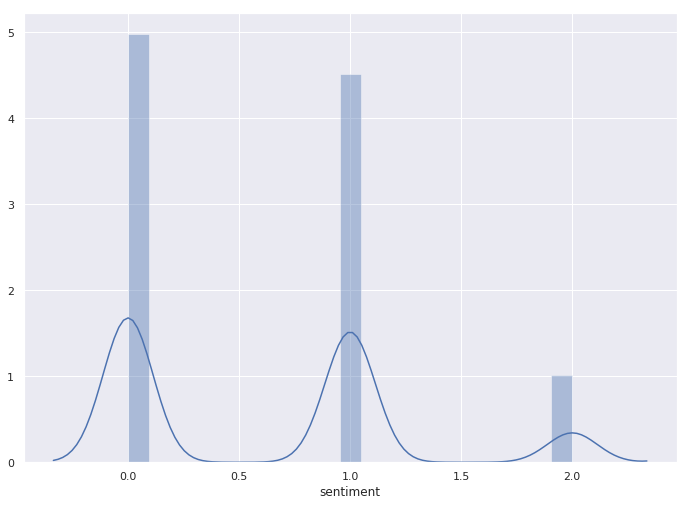

In [46]:
sns.distplot(df_res_pandas['sentiment'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Lets do more with Twint

In [30]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append("twint/")

import twint
import numpy as np
from PIL import Image
from os import path

# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Disable annoying printing

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

## Get tweets easily

In [3]:
def get_tweets(search, limit=100):
    c = twint.Config()
    c.Search = search
    c.Limit = limit
    c.Pandas = True
    c.Pandas_clean = True

    with HiddenPrints():
        print(twint.run.Search(c))
    return twint.output.panda.Tweets_df[["username","tweet"]]

In [4]:
tweets = get_tweets("data science", limit=10000)

In [5]:
tweets.count()

username    10003
tweet       10003
dtype: int64

## Generate word cloud

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

text = tweets.tweet.values

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("xa0")
stopwords.add("xa0'")
stopwords.add("bitly")
stopwords.add("bit")
stopwords.add("ly")
stopwords.add("twitter")
stopwords.add("pic")

wordcloud = WordCloud(
    background_color = 'black',
    width = 1000,
    height = 500,
    stopwords = stopwords).generate(str(text))

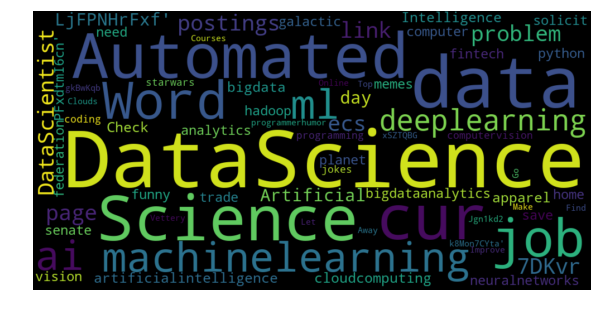

In [8]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [10, 10]

In [12]:
def generate_word_cloud(tweets):
    
    # Getting the text out of the tweets
    text = tweets.tweet.values
    
    # adding movie script specific stopwords
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("xa0")
    stopwords.add("xa0'")
    stopwords.add("bitly")
    stopwords.add("bit")
    stopwords.add("ly")
    stopwords.add("twitter")
    stopwords.add("pic")

    wordcloud = WordCloud(
        background_color = 'black',
        width = 1000,
        height = 500,
        stopwords = stopwords).generate(str(text))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.rcParams['figure.figsize'] = [10, 10]

## Other example

In [14]:
tweets = get_tweets("artificial intelligence", limit=1000)

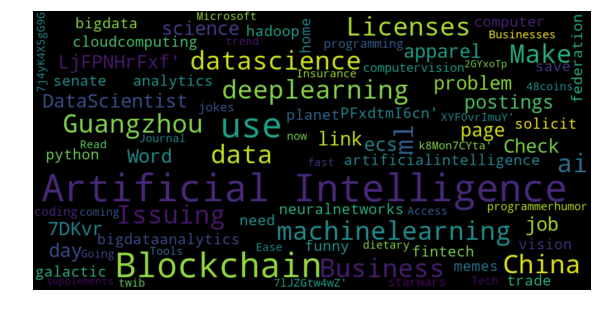

In [15]:
generate_word_cloud(tweets)